In [8]:
import pandas as pd
dataset = pd.read_csv('sensirion_fluke.csv')
dataset

,percent,average-flow(L/min)-Fluke,std_dev-Fluke,average-flow(L/min)-Sensirion,std_dev-Sensirion
0,0,-0.00538,0.010356,0.027115,0.008844
1,10,30.79568,0.220888,27.981859,0.278657
2,20,54.66474,0.893222,49.813137,0.538031
3,30,75.79554,0.722840,71.491416,0.855897
4,40,94.53316,0.860254,88.083492,1.639698
5,50,113.41010,0.994574,108.806619,1.844541
6,60,132.40390,1.295995,125.364054,2.007689
7,70,149.86704,1.660393,139.420435,2.427043
8,80,165.25638,2.063677,153.832195,2.610911
9,90,178.85758,2.419309,166.290982,2.443631


In [9]:
# melihat ukuran data
dataset.shape

(11, 5)

<AxesSubplot:xlabel='average-flow(L/min)-Fluke', ylabel='average-flow(L/min)-Sensirion'>

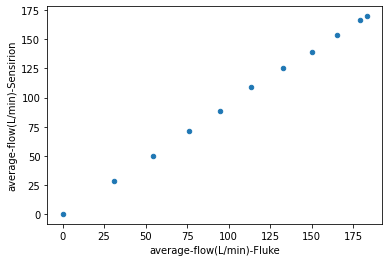

In [13]:
# melihat grafik average flow fluke dan average flow sensirion
import matplotlib as plt
dataset.plot(kind='scatter', x ='average-flow(L/min)-Fluke', y='average-flow(L/min)-Sensirion')

<AxesSubplot:xlabel='percent', ylabel='average-flow(L/min)-Sensirion'>

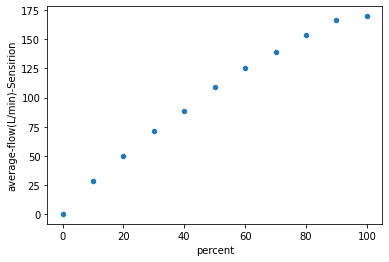

In [14]:
#  melihat grafik percent dan average flow sensirion
dataset.plot(kind='scatter', x ='percent', y='average-flow(L/min)-Sensirion')

In [15]:
# membuat semua elemen menjadi sebuah array
average_flow_fluke= dataset['average-flow(L/min)-Fluke'].values

In [16]:
# membuat tiap elemen menjadi array per indeks
average_flow_fluke = average_flow_fluke.reshape(-1,1)
average_flow_fluke

array([[-5.3800000e-03],
       [ 3.0795680e+01],
       [ 5.4664740e+01],
       [ 7.5795540e+01],
       [ 9.4533160e+01],
       [ 1.1341010e+02],
       [ 1.3240390e+02],
       [ 1.4986704e+02],
       [ 1.6525638e+02],
       [ 1.7885758e+02],
       [ 1.8312862e+02]])

In [17]:
average_flow_sensirion = dataset['average-flow(L/min)-Sensirion'].values
average_flow_sensirion

array([2.71153850e-02, 2.79818590e+01, 4.98131372e+01, 7.14914159e+01,
       8.80834921e+01, 1.08806619e+02, 1.25364054e+02, 1.39420435e+02,
       1.53832195e+02, 1.66290982e+02, 1.69857681e+02])

In [18]:
percent = dataset['percent'].values


In [19]:
percent = percent.reshape(-1,1)
percent

array([[  0],
       [ 10],
       [ 20],
       [ 30],
       [ 40],
       [ 50],
       [ 60],
       [ 70],
       [ 80],
       [ 90],
       [100]], dtype=int64)

In [20]:
# membuat model 
from sklearn.linear_model import LinearRegression


In [21]:
# memasukkan input dan output
linreg_fluke_sensirion = LinearRegression().fit(average_flow_fluke,average_flow_sensirion)


In [27]:
linreg_percent_sensirion = LinearRegression().fit(percent, average_flow_sensirion)

In [32]:
# y = mx + b
# coefisien untuk linear regression fluke sensirion
linreg_fluke_sensirion.coef_

array([0.93307304])

In [33]:
#  intercept 
linreg_fluke_sensirion.intercept_

0.10444764093406889

In [34]:
linreg_percent_sensirion.coef_

array([1.71598645])

In [35]:
linreg_percent_sensirion.intercept_

14.288767102954537

In [36]:
# prediksi untuk fluke
y_pred_fluke = linreg_fluke_sensirion.predict(average_flow_fluke)
y_pred_fluke

array([9.94277080e-02, 2.88390664e+01, 5.11106429e+01, 7.08272227e+01,
       8.83107908e+01, 1.05924355e+02, 1.23646957e+02, 1.39941342e+02,
       1.54300721e+02, 1.66991634e+02, 1.70976826e+02])

In [37]:
#  presiksi untuk percent
y_pred_percent = linreg_fluke_sensirion.predict(percent)
y_pred_percent

array([ 0.10444764,  9.43517806, 18.76590847, 28.09663889, 37.4273693 ,
       46.75809972, 56.08883014, 65.41956055, 74.75029097, 84.08102138,
       93.4117518 ])

<function matplotlib.pyplot.show(close=None, block=None)>

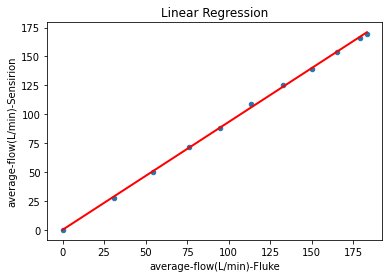

In [38]:
# visualisasi linear regression average flow fluke dan average flow sensirion
import matplotlib.pyplot as plt
dataset.plot(kind='scatter', x ='average-flow(L/min)-Fluke', y='average-flow(L/min)-Sensirion')
plt.plot(average_flow_fluke, y_pred_fluke, color='red', linewidth=2)
plt.title('Linear Regression')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

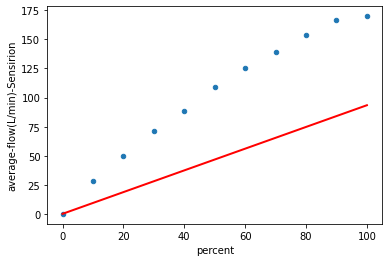

In [39]:
#  visualisasi linear regression percent dan average flow sensirion
dataset.plot(kind='scatter', x ='percent', y='average-flow(L/min)-Sensirion')
plt.plot(percent, y_pred_percent, color='red', linewidth=2)
plt.show

In [40]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree= 2)
poly_1 = polynom.fit_transform(average_flow_fluke)
poly_2 = polynom.fit_transform(percent)


In [41]:
polyreg = LinearRegression()
poly_fluke = polyreg.fit(poly_1, average_flow_sensirion)
poly_percent = polyreg.fit(poly_2, average_flow_sensirion)

In [42]:
# prediksi polynomial
poly_prediction_fluke = poly_fluke.predict(polynom.fit_transform(average_flow_fluke))
poly_prediction_fluke
                                     

array([  0.91282726,  72.75637796, 116.80682857, 147.33339653,
       167.74807794, 181.98948327, 189.91148558, 191.52380896,
       188.44100406, 182.20394408, 179.56541605])

In [43]:
# prediksi polynomial
poly_prediction_percent= poly_percent.predict(polynom.fit_transform(percent))
poly_prediction_percent
                          

array([  0.926852  ,  26.10386556,  49.49929044,  71.11312664,
        90.94537416, 108.996033  , 125.26510316, 139.75258464,
       152.45847744, 163.38278156, 172.52549699])

<function matplotlib.pyplot.show(close=None, block=None)>

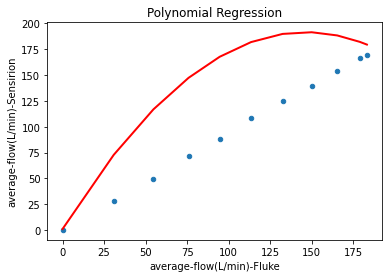

In [44]:
# visualisasi polynomial regression untuk average flow fluke dan average flow sensirion 
import matplotlib.pyplot as plt
dataset.plot(kind='scatter', x ='average-flow(L/min)-Fluke', y='average-flow(L/min)-Sensirion')
plt.plot(average_flow_fluke, poly_prediction_fluke, color='red', linewidth=2)
plt.title('Polynomial Regression')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

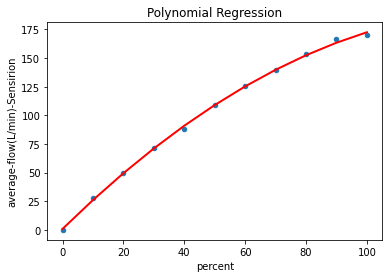

In [45]:
#  visualisasi polynomial regression untuk percent dan average flow sensirion
dataset.plot(kind='scatter', x ='percent', y='average-flow(L/min)-Sensirion')
plt.plot(percent, poly_prediction_percent, color='red', linewidth=2)
plt.title('Polynomial Regression')
plt.show

lihat score masing-masihng dengan menggunakan regresi yang berbeda

In [46]:
average_flow_sensirion = average_flow_sensirion.reshape(-1,1)

In [47]:
# regresi score average flow fluke dan average flow sensirion menggunakan Linear Regression
from sklearn import metrics
linReg_score_fluke = metrics.r2_score(average_flow_sensirion,y_pred_fluke)
linReg_score_fluke

0.9995043642253753

In [48]:
# regresi score percent dan average flow sensirion menggunakan Linear Regression

linReg_score_percent = metrics.r2_score(average_flow_sensirion,poly_prediction_fluke)
linReg_score_percent

0.02198304047717703

In [49]:
# regresi score average flow fluke dan average flow sensirion menggunakan Polynomial Regression

polyReg_score_fluke = metrics.r2_score(average_flow_sensirion,y_pred_percent)
polyReg_score_fluke

-0.1702846225280623

In [50]:
# regresi score percent dan average flow sensirion menggunakan Polynomial Regression

polyReg_score_percent = metrics.r2_score(average_flow_sensirion,poly_prediction_percent)
polyReg_score_percent

0.9990820376720094

Kesimpulan 

1. Penggunaan Linear Regression antara average flow fluke dan average flow sensirion mempunyai tingkat akurasi yang lebih baik dibanding dengan menggunakan Polynomial Regression.
2. Penggunaan Polynomial Regression antara percent dan average flow sensirion mempunyai tingkat akurasi yang lebih baik dibanding dengan menggunakan Linear Regression.
3. Masing-masing regresi memiliki keunikan tersendiri dan dipakai kedalam kasus yang berbeda-beda sehingga menghasilkan hasil yang optimal. 